In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

## Filling missing num vals using Pandas


In [7]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
x_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [29]:
# getting mean and median
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [45]:
missing = x_train
missing['mean_age'] = x_train['Age'].fillna(mean_age)
missing['median_age'] = x_train['Age'].fillna(median_age)

missing['mean_fare'] = x_train['Fare'].fillna(mean_fare)
missing['median_fare'] = x_train['Fare'].fillna(median_fare)


In [46]:
missing.shape

(712, 7)

In [47]:
x_train.shape

(712, 7)

<Axes: ylabel='Density'>

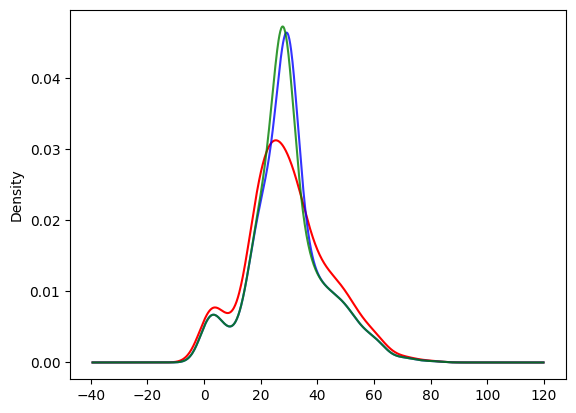

In [48]:
# ploting age
x_train['Age'].plot(kind='kde', color='red', label='Original')
missing['mean_age'].plot(kind='kde', color='blue', label='Mean', alpha=0.8)
missing['median_age'].plot(kind='kde', color='green', label='Median', alpha=0.8)

### this is happening because all the missing vals are either replace by mean or median so the amount of vals at mean or median has increased and we got this -- this is too much and a red flag

<Axes: ylabel='Density'>

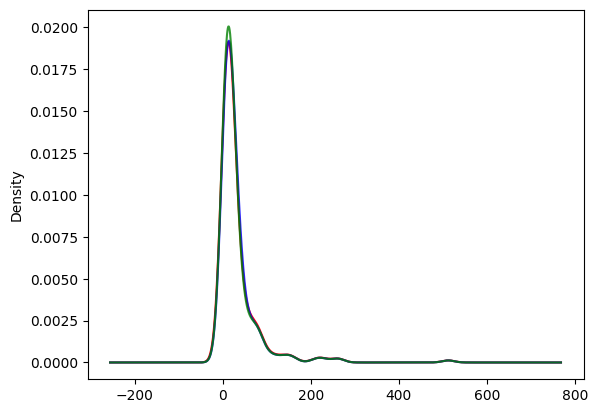

In [49]:
# ploting fare
x_train['Fare'].plot(kind='kde', color='red', label='Original')
missing['mean_fare'].plot(kind='kde', color='blue', label='Mean', alpha=0.8)
missing['median_fare'].plot(kind='kde', color='green', label='Median', alpha=0.8)

### this indicates a good sign and also suggests that it is MCAR

<Axes: >

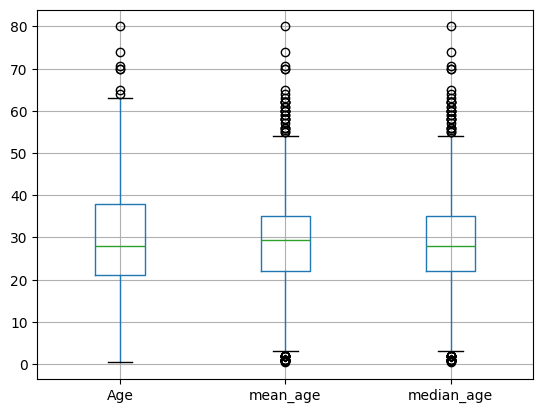

In [51]:
# boxplot

missing[['Age', 'mean_age', 'median_age']].boxplot()

<Axes: >

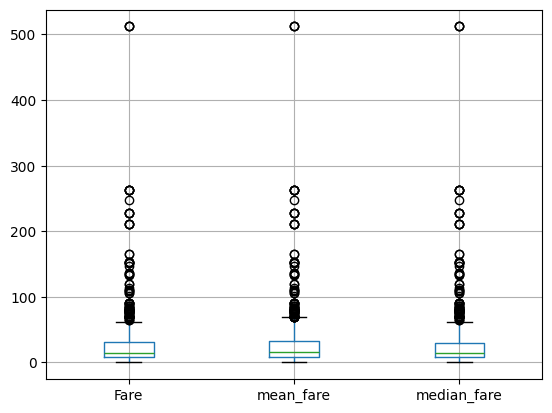

In [52]:
missing[['Fare', 'mean_fare', 'median_fare']].boxplot()

In [58]:
missing.cov()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
mean_age,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
median_age,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
mean_fare,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
median_fare,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [54]:
missing.corr()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
mean_age,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
median_age,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
mean_fare,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
median_fare,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


## using this imputation for fare is good but not for age

# using sklearn

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
trf = ColumnTransformer([
    ('tnf1', SimpleImputer(strategy='mean'), ['Age']),
    ('tnf2', SimpleImputer(strategy='median'), ['Fare'])
], remainder='passthrough')

In [62]:
trf.fit(x_train)

C:\Users\UTSAV\anaconda3\envs\mlc\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf1', SimpleImputer(), ['Age']),
                                ('tnf2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [63]:
x_train_transformed = trf.transform(x_train)
x_test_transformed = trf.transform(x_test)

## arbitrary val imputation

In [65]:
trf2 = ColumnTransformer([
    ('new_age', SimpleImputer(strategy='constant', fill_value=99), ['Age']),
    ('new_fare', SimpleImputer(strategy='constant', fill_value=999), ['Fare'])
], remainder='passthrough')

In [66]:
trf2.fit(x_train)

C:\Users\UTSAV\anaconda3\envs\mlc\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('new_age',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('new_fare',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [75]:
new_xtrain = trf2.transform(x_train)
new_xtest = trf2.transform(x_test)

In [76]:
new_xtrain = pd.DataFrame(columns=x_train.columns, data=new_xtrain)
new_xtest = pd.DataFrame(columns=x_test.columns, data=new_xtest)

<Axes: ylabel='Density'>

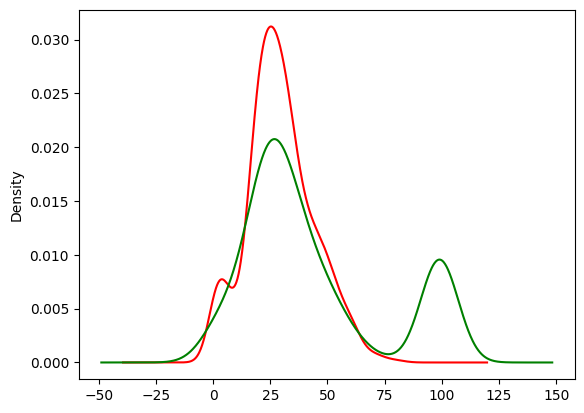

In [79]:
x_train['Age'].plot(kind='kde', color='red')
new_xtrain['Age'].plot(kind='kde', color='green')

<Axes: ylabel='Density'>

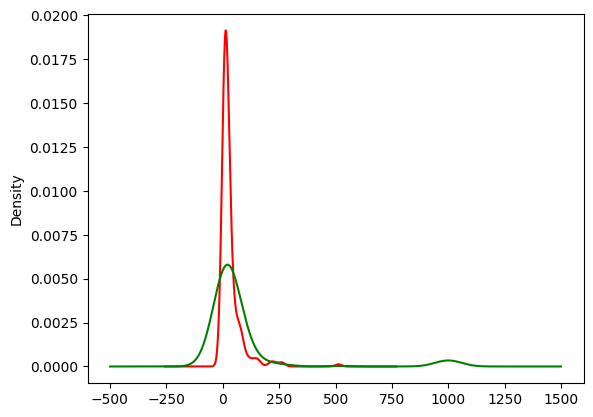

In [80]:
x_train['Fare'].plot(kind='kde', color='red')
new_xtrain['Fare'].plot(kind='kde', color='green')